# Connect to Google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Download and extract the data

files:
- "sample_submission",
- "train"


source:
https://www.kaggle.com/competitions/tensorflow-speech-recognition-challenge/data?select=test.7z


Google Drive:
https://drive.google.com/drive/folders/1--pB3cJQl5UMM_Z-J4AAhhOne4KegOLI?usp=sharing


The following code block is written in Python and is intended to be used in a Colab notebook. It performs the extraction of .7z files for the TensorFlow Speech Recognition Challenge dataset. Here is a summary of the code's functionality:

1. The code starts by defining the paths to the training directory (`drive_train_dir`) and the sample submission file (`drive_sample_submission`).

2. The `extract_7z` function is defined to extract .7z files using the `py7zr` library.

3. The code checks if the `drive_train_dir` directory exists. If it doesn't, it proceeds to the next steps to extract the training data.

4. Inside the conditional block, the code checks if the file `train.7z` exists. If it doesn't, it installs the Kaggle API, uploads the Kaggle API key file, and downloads the required files using the Kaggle API.

5. After downloading the files, the `py7zr` library is installed, and the `extract_7z` function is called to extract the training data to the specified target directory (`train_dir`).

6. The code then checks if the `drive_sample_submission` directory exists. If it doesn't, it proceeds to the next steps to extract the sample submission data.

7. Inside the conditional block, the code checks if the file `sample_submission.7z` exists. If it doesn't, it installs the Kaggle API, uploads the Kaggle API key file, and downloads the required files using the Kaggle API.

8. After downloading the files, the `py7zr` library is installed, and the `extract_7z` function is called to extract the sample submission data to the specified target directory (`sample_submission_dir`).

The code ensures that the necessary files are downloaded and extracted to their respective directories. It handles the extraction of .7z files using the `py7zr` library and checks if the files already exist before performing any downloads.


In [ ]:
import os


drive_train_dir = r'/content/drive/MyDrive/ITC_final_project/Data/train'
drive_sample_submission = r'/content/drive/MyDrive/ITC_final_project/Data/sample_submission.csv'



# Function to extract .7z files
def extract_7z(file_path, target_dir):
  unpack_7zarchive(file_path, target_dir)


# If "drive_train_dir" directory dones't exist, perform the extraction
if not os.path.exists(drive_train_dir):
    from pathlib import Path

    # Check if the file "train.7z" exist
    if not Path('/content/train.7z').exists():
        # Install the Kaggle API
        !pip install kaggle

        # Upload your Kaggle API key file (kaggle.json) to Colab
        from google.colab import files
        files.upload()

        # Move the uploaded Kaggle API key file to the required directory
        !mkdir ~/.kaggle
        !mv kaggle.json ~/.kaggle/
        !chmod 600 ~/.kaggle/kaggle.json

        # Download the files using the Kaggle API
        !kaggle competitions download -c tensorflow-speech-recognition-challenge -f train.7z -p /content


    # Extract the downloaded .7z files
    !pip install py7zr
    from py7zr import unpack_7zarchive

    # Specify the target directories for extraction
    train_dir = '/content/drive/MyDrive/ITC_final_project/Data'

    # Specify the paths of the .7z files
    train_7z_path = '/content/train.7z'

    # Create the target directories if they don't exist
    os.makedirs(train_dir, exist_ok=True)

    # Extract the files
    extract_7z(train_7z_path, train_dir)



# If the directory in "drive_sample_submission" doesn't exist, perform the extraction
if not os.path.exists(drive_sample_submission):
    import os
    from pathlib import Path

    # Check if the files exist
    if not Path('/content/sample_submission.7z').exists():
        # Install the Kaggle API
        !pip install kaggle

        # Upload your Kaggle API key file (kaggle.json) to Colab
        from google.colab import files
        files.upload()

        # Move the uploaded Kaggle API key file to the required directory
        !mkdir ~/.kaggle
        !mv kaggle.json ~/.kaggle/
        !chmod 600 ~/.kaggle/kaggle.json

        # Download the files using the Kaggle API
        !kaggle competitions download -c tensorflow-speech-recognition-challenge -f sample_submission.7z -p /content


    # Extract the downloaded .7z files
    !pip install py7zr
    from py7zr import unpack_7zarchive

    # Specify the target directories for extraction
    sample_submission_dir = '/content/drive/MyDrive/ITC_final_project/Data'

    # Specify the paths of the .7z files
    sample_submission_7z_path = '/content/sample_submission.7z'

    # Create the target directories if they don't exist
    os.makedirs(sample_submission_dir, exist_ok=True)

    # Extract the files
    extract_7z(sample_submission_7z_path, sample_submission_dir)

# creating dataframe


The following code block performs the initialization and construction of a DataFrame from the audio files in the training directory of the TensorFlow Speech Recognition Challenge dataset. Here is a summary of the code's functionality:

1. The code first defines the `audio_dir` variable, which is the path to the 'audio' directory within the `drive_train_dir` directory.

2. An empty list called `rows` is initialized to store the rows of the DataFrame.

3. The code iterates through the folders in the `audio_dir` directory. For each label, it checks if it is a directory and skips the '_background_noise_' folder.

4. Within each label directory, the code iterates through the files. It only considers files with the '.wav' extension.

5. For each valid audio file, the code extracts the label, speaker ID, and sample ID from the file name. It then appends a dictionary containing these values and the file path to the `rows` list.

6. After processing the label directories, the code adds the background noise files. It iterates through the files in the '_background_noise_' directory and extracts the speaker ID from the file name. For each background noise file, a dictionary is appended to the `rows` list with the label set as 'background' and the sample ID as 0.

7. Finally, the `rows` list is used to create a DataFrame using the pandas library, and the resulting DataFrame is assigned to the variable `df`.

The code efficiently gathers information about the audio files, including their file paths, labels, speaker IDs, and sample IDs, and organizes them into a pandas DataFrame for further processing and analysis.




In [ ]:
import pandas as pd

audio_dir = os.path.join(drive_train_dir, 'audio')

# Initialize an empty list to store rows
rows = []

# Iterate through the folders in the train directory
for label in os.listdir(audio_dir):
    label_dir = os.path.join(audio_dir, label)

    # Skip the "_background_noise_" folder
    if label == '_background_noise_':
        continue

    # Check if it is a directory
    if not os.path.isdir(label_dir):
        continue

    # Iterate through the files in the label directory
    for file_name in os.listdir(label_dir):
        if file_name.endswith('.wav'):
            file_path = os.path.join(label_dir, file_name)

            # Extract the label, speaker id, and sample id from the file name
            label_parts = file_name.split('_')
            speaker_id = label_parts[0]
            sample_id = label_parts[-1].split('.')[0]

            # Append the row to the list
            rows.append({'file_path': file_path, 'label': label,
                         'speaker_id': speaker_id, 'sample_id': sample_id})

# Add the background noise files
background_noise_dir = os.path.join(audio_dir, '_background_noise_')
for file_name in os.listdir(background_noise_dir):
    if file_name.endswith('.wav'):
        file_path = os.path.join(background_noise_dir, file_name)

        # Extract the speaker id from the file name
        speaker_id = os.path.splitext(file_name)[0]

        # Append the row to the list with label as 'background' and sample ID as 0
        rows.append({'file_path': file_path, 'label': 'background',
                     'speaker_id': speaker_id, 'sample_id': 0})

# Create the dataframe from the list of rows
df = pd.DataFrame(rows)


# light EDA on the raw data

In [ ]:
print("\ndf shape is:", df.shape)
print("\ndf columns are:", ', '.join(df.columns))
print("\nnumber of unique labels:", df['label'].nunique())
print("\nunique labels:\n", ', '.join(df['label'].sort_values().unique()))



df shape is: (64907, 4)

df columns are: file_path, label, speaker_id, sample_id

number of unique labels: 31

unique labels:
 background, bed, bird, cat, dog, down, eight, five, four, go, happy, house, left, marvin, nine, no, off, on, one, right, seven, sheila, six, stop, three, tree, two, up, wow, yes, zero


In [ ]:
df.sample(5)

,file_path,label,speaker_id,sample_id
6752,/content/drive/MyDrive/ITC_final_project/Data/...,dog,538e1856,0
32072,/content/drive/MyDrive/ITC_final_project/Data/...,off,fd395b74,2
51265,/content/drive/MyDrive/ITC_final_project/Data/...,three,f292725f,0
60153,/content/drive/MyDrive/ITC_final_project/Data/...,yes,f2dd248e,0
26003,/content/drive/MyDrive/ITC_final_project/Data/...,marvin,4abefdf5,0


In [ ]:
import random
import IPython.display as ipd

# Sample 7 files randomly
sample_files = df.sample(7)

# Iterate through the sampled files
for _, row in sample_files.iterrows():
    file_path = row['file_path']
    label = row['label']

    # Print the label
    print("Label:", label)

    # Play the audio file
    audio = ipd.Audio(file_path)
    display(audio)


Label: happy


Label: cat


Label: yes


Label: down


Label: nine


Label: no


Label: bed


In [ ]:
print("missing data check:\n")
df.isna().any()

missing data check:



file_path     False
label         False
speaker_id    False
sample_id     False
dtype: bool

In [ ]:
print("features:", ', '.join(df.columns))

features: file_path, label, speaker_id, sample_id


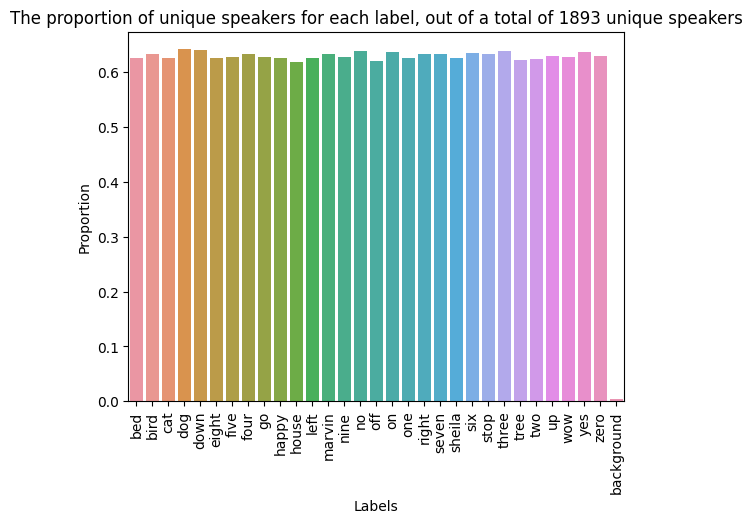

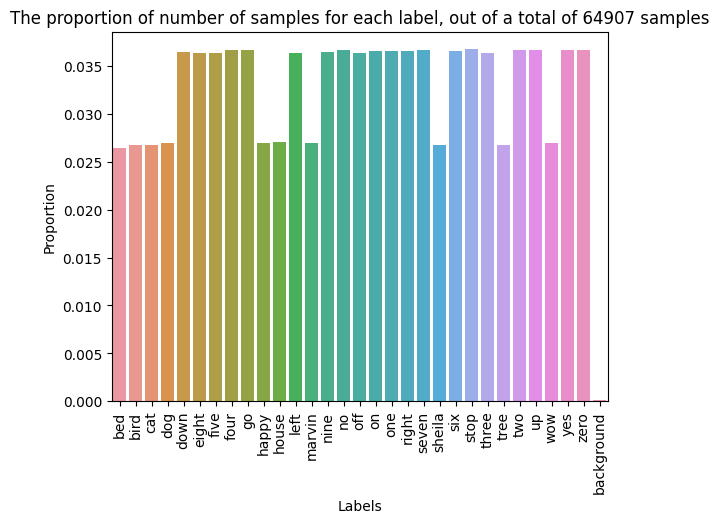

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


total_speakers = df.speaker_id.nunique()
total_samples = df.shape[0]

labels = []
speaker_ratio_per_label = []
samples_ratio_per_label = []


for i, label in enumerate(df.label.unique()):
  labels.append(label)
  speaker_ratio_per_label.append(df.speaker_id[df.label==label].nunique() / total_speakers)
  samples_ratio_per_label.append(df[df.label==label].shape[0] / total_samples)



sns.barplot(x=labels, y=speaker_ratio_per_label, fill=True)
plt.xlabel("Labels")
plt.ylabel("Proportion")
plt.xticks(rotation=90)
plt.title(f"The proportion of unique speakers for each label, out of a total of {total_speakers} unique speakers")
plt.show()

sns.barplot(x=labels, y=samples_ratio_per_label, fill=True)
plt.xlabel("Labels")
plt.ylabel("Proportion")
plt.xticks(rotation=90)
plt.title(f"The proportion of number of samples for each label, out of a total of {total_samples} samples")
plt.show()

# Embed the background sounds

The following code block performs the following steps:

1. Creates a new directory named "audio_with_background" to store files with added background noise.
2. Iterates through each row in the DataFrame.
3. Copies the original file to a new file path in the "audio_with_background" directory, using a new file name with the label as a prefix.
4. Checks if the file already exists in the directory before proceeding.
5. If the label is not 'background', selects a random background sound file from the provided directory.
6. Reads the original file and the background sound file to obtain sample rates and durations.
7. Adjusts the length of the background sound to match the length of the original file by sampling a part or duplicating it.
8. Adds the adjusted background sound to the original file.
9. Writes the new data to the new file path with added background noise.
10. Updates the DataFrame with the new file path containing the added background noise.

In [ ]:
import os
import random
import shutil
import soundfile as sf
import numpy as np

# Create the new directory "audio_with_background"
new_directory = r"/content/drive/MyDrive/ITC_final_project/Data/train/audio_with_background"
os.makedirs(new_directory, exist_ok=True)

background_sounds_dir = r"/content/drive/MyDrive/ITC_final_project/Data/train/audio/_background_noise_"

# List of existing files
existing_files = np.array([filename.split("_", 1)[1] for filename in os.listdir(new_directory) if filename.endswith(".wav")])

# add file_path basename feature to df dataframe
df['basename'] = df['file_path'].apply(lambda x: os.path.basename(x))


# Iterate through each row in the DataFrame
for index, row in df[~df['basename'].isin(existing_files)].iterrows():
    file_path = row['file_path']
    label = row['label']

    # Generate the new file name with the label as a prefix
    file_name = row['basename']
    new_file_name = f"{label}_{file_name}"

    # Specify the new file path in the "audio_with_background" directory
    new_file_path = os.path.join(new_directory, new_file_name)

    # Check if the file already exists in the directory
    if new_file_name not in existing_files:
        np.append(existing_files, new_file_name)

        # Copy the original file to the new file path
        shutil.copyfile(file_path, new_file_path)

        if label != 'background':
            # Select a random background sound
            background_sound = random.choice([sound for sound in os.listdir(background_sounds_dir) if sound.endswith('.wav')])

            background_sound_path = os.path.join(background_sounds_dir, background_sound)

            # Read the original file to get the sample rate and duration
            original_data, original_samplerate = sf.read(file_path)

            # Read the background sound file
            background_data, background_samplerate = sf.read(background_sound_path)

            # Adjust the length of the background sound to match the length of the original file
            if len(background_data) >= len(original_data):
                # If the background sound is longer or equal, sample a part to match the length
                max_start_pos = len(background_data) - len(original_data)
                start_pos = random.randint(0, max_start_pos)
                background_data = background_data[start_pos: start_pos + len(original_data)]
            else:
                # If the background sound is shorter, duplicate it to match the length
                num_repeats = len(original_data) // len(background_data)
                background_data = np.tile(background_data, num_repeats + 1)
                background_data = background_data[:len(original_data)]

            # Add the background sound to the new file
            new_data = original_data + background_data

            # Write the new data to the new file path
            sf.write(new_file_path, new_data, original_samplerate)

        # Add the new file path with added background noise to the DataFrame
        df.at[index, 'with_background_file_path'] = new_file_path


In [ ]:
# make sure the number of the embeded files is equal to the number of rows in df
assert existing_files.shape[0] == df.shape[0]

# split to train validation and test set

Here is a breakdown of the steps performed by the code:

1. Define the categories for the labels. Two sets of categories are defined: one for "kaggle categories" and one for "DreamTeam categories." The chosen set of categories is used for further processing.

2. Define the number of files to load (`FILES_TO_LOAD`), which determines how many audio files will be processed.

3. Define the proportions of the train, validation, and test sets (`train_proportion`, `val_proportion`), which specify the distribution of the files among these sets.

4. Define the input directory path where the `.wav` files are located (`input_directory`).

5. Mount Google Drive to access files from Google Colab.

6. Create empty lists to store the audio file paths, labels, and user IDs.

7. Assign labels and user IDs to each audio file by iterating over the files in the input directory. Only files ending with `.wav` are considered.

8. Convert the lists of file paths, labels, and user IDs into numpy arrays for faster processing.

9. Get the indices where labels are present in the defined categories.

10. Calculate the average number of rows per unique label in the defined categories.

11. Identify labels that are not present in the defined categories.

12. Generate a balanced domain by randomly sampling from each label, considering the average number of rows per label and the remaining rows.

13. Randomly choose a subset of files (`FILES_TO_LOAD`) from the balanced domain obtained in the previous step.

14. Retrieve the file paths, labels, and user IDs for the selected samples.

15. Calculate the count of files per user ID.

16. Allocate files to the train, validation, and test sets based on the user IDs, considering the specified proportions.

17. Shuffle the indices of the train, validation, and test sets.

18. Create pandas DataFrames for the train, validation, and test data using the shuffled indices.

19. Print the shape (number of rows and columns) of each dataset (train, validation, and test).



In [ ]:
"""
This code serves as an additional step to the data splitting code.
Its objective is to create a list of missing_files, which represents the files
that have not yet been preprocessed. Over time, as we gradually preprocess all
the files and store them in Drive, the missing_files list helps us keep track of
the remaining files to be processed. This list is then passed on to the next
code, where it is used to create the domain of files available for selection,
specifically for those files that have not been preprocessed yet.
"""

import pickle
import numpy as np
import os


from google.colab import drive
drive.mount('/content/drive')


folder_path = r'/content/drive/MyDrive/ITC_final_project/Pickle/Preprocessed data/ready_data_sets/'


train_file_path = folder_path + 'train_file_paths.pickle'
val_file_path = folder_path + 'val_file_paths.pickle'
test_file_path = folder_path + 'test_file_paths.pickle'



with open(train_file_path, 'rb') as file:
    X_train_file_path = pickle.load(file)

with open(val_file_path, 'rb') as file:
    X_val_file_path = pickle.load(file)

with open(test_file_path, 'rb') as file:
    X_test_file_path = pickle.load(file)


preprocessed_files = np.concatenate((X_train_file_path, X_val_file_path, X_test_file_path), axis=0)

# Define the input directory path where the .wav files are located
input_directory = "/content/drive/MyDrive/ITC_final_project/Data/train/audio_with_background"
pickle_file_path = os.path.join(input_directory, "existing_files.pickle")
with open(pickle_file_path, 'rb') as file:
    existing_files = pickle.load(file)

existing_files = np.array([os.path.join(input_directory, file) for file in os.listdir(input_directory) if file.endswith(".wav")])

missing_files = np.setdiff1d(existing_files, preprocessed_files)


print("remaining files to preprocess:", missing_files.shape[0])


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
remaining files to preprocess: 49907


In [ ]:
import os
import random
import pandas as pd
import numpy as np
from collections import Counter
from google.colab import drive


# # kaggle categories
# CATEGORIES = ['yes', 'no', 'up', 'down', 'left', 'right', 'on', 'off', 'stop', 'go', 'silence', 'unknown']

# DreamTeam categories
CATEGORIES = ['yes', 'no', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'up', 'down', 'unknown']

# define how many files to load
FILES_TO_LOAD = 15000

# Define the proportions of train, validation (test sets = 1-(train_proportion + val_proportion))
train_proportion = 0.8
val_proportion = 0.1

# Define the input directory path where the .wav files are located
input_directory = "/content/drive/MyDrive/ITC_final_project/Data/train/audio_with_background"



"""
The objective of this section is to establish a balanced domain where each
unique label from the CATEGORIES list has an equal probability of being selected.

Categories that are not found in the CATEGORIES list are considered 'unknown' labels.
This ensures that every category, including 'unknown', contributes proportionately
to the sample count within the domain.

The number of 'unknown' label samples is adjusted to align with the average number
of samples per category within the CATEGORIES list. Each category that is not
included in the CATEGORIES list has the same ratio within the 'unknown' label samples.
"""

# Mount Google Drive
drive.mount('/content/drive')

# Create lists to store the audio file paths, labels, and user IDs
file_paths = []
labels = []
user_ids = []

# Assign user_id and category labels to all audio files
# for file in os.listdir(input_directory):
for path in missing_files:
    file = os.path.basename(path)
    if not file.endswith(".wav"):
        continue
    file_path = os.path.join(input_directory, file)

    file_paths.append(file_path)
    labels.append(file.split("_")[0])
    user_ids.append(file.split("_")[1])


# convert list to arrays for fast results
file_paths = np.array(file_paths)
labels = np.array(labels)
user_ids = np.array(user_ids)

# Get the indices where labels are present in CATEGORIES
indices_in_categories = np.where(np.isin(labels, CATEGORIES))[0]

# Calculate the average number of rows per unique label in CATEGORIES
average_rows_per_label = len(indices_in_categories) / len(np.intersect1d(np.unique(labels), CATEGORIES))

labels_not_in_categories = np.setdiff1d(np.unique(labels), CATEGORIES)

# calculate the indices of the sample domain
domain_indices = indices_in_categories
remaining_rows = average_rows_per_label
for i, label in enumerate(iterable=labels_not_in_categories):
    average_per_remain_categories = int(remaining_rows/(len(labels_not_in_categories) - i))
    label_indices = np.where(labels == label)[0]
    samples_qty = min(len(label_indices), average_per_remain_categories)
    remaining_rows -= samples_qty
    domain_indices = np.append(domain_indices, np.random.choice(label_indices, samples_qty, replace=False))




"""
This section randomly selects samples and distributes them across the training, validation, and test sets based on the user_id.
"""

# Randomly choose 'FILES_TO_LOAD' files
FILES_TO_LOAD = min(FILES_TO_LOAD, len(domain_indices))
samples_indices = np.random.choice(domain_indices, FILES_TO_LOAD, replace=False)


# convert list to arrays for fast results
file_paths_samples = file_paths[samples_indices]
labels = labels[samples_indices]
user_ids = user_ids[samples_indices]

# # Change labels that are not in CATEGORIES to 'unknown'
# labels = np.where(np.isin(labels, labels_not_in_categories), 'unknown', labels)


# allocate user_id to each set
files_per_user_dict = Counter(user_ids)
files_user_tuples = list(zip(files_per_user_dict.values(), files_per_user_dict.keys()))

train_indices = []
val_indices = []
test_indices = []
train_qty , val_qty = 0, 0

for qty, user in sorted(files_user_tuples, key=lambda x: x[0], reverse=True):
  if train_qty + qty <= int(train_proportion * FILES_TO_LOAD):
    train_indices.extend(np.where(user_ids == user)[0].tolist())
    train_qty += qty
  elif val_qty + qty <= int(val_proportion * FILES_TO_LOAD):
    val_indices.extend(np.where(user_ids == user)[0].tolist())
    val_qty += qty
  else:
    test_indices.extend(np.where(user_ids == user)[0].tolist())


import numpy as np

# Shuffle the indices
np.random.shuffle(train_indices)
np.random.shuffle(val_indices)
np.random.shuffle(test_indices)


# creating train , validation and test data frames
train_data = pd.DataFrame({'file_paths': file_paths[train_indices], 'labels': labels[train_indices]})
val_data = pd.DataFrame({'file_paths': file_paths[val_indices], 'labels': labels[val_indices]})
test_data = pd.DataFrame({'file_paths': file_paths[test_indices], 'labels': labels[test_indices]})

# Print the shape of each dataset
print("Train dataset shape: \t", train_data.shape)
print("Validation dataset shape: ", val_data.shape)
print("Test dataset shape: \t", test_data.shape)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Train dataset shape: 	 (12000, 2)
Validation dataset shape:  (1500, 2)
Test dataset shape: 	 (1500, 2)


# Labels preprocessing: one_hot pipeline


the OneHotEncoder is used for neural network-based deep learning models. It converts each class label into a binary vector representation, where each class corresponds to a unique combination of zeros and ones. This encoding ensures that the neural network treats each class independently and avoids any assumptions about the numerical relationship between the labels.

The code performs the following steps:

1. Define a custom transformer class called `OneHotLabelEncoder` that inherits from `BaseEstimator` and `TransformerMixin`. This class is responsible for performing one-hot encoding on categorical labels. It has methods for fitting, transforming, and inverse transforming the labels.

2. Inside the `OneHotLabelEncoder` class, define the constructor (`__init__` method) which initializes the object. It takes a parameter called `categories`, which is a list of categories for the labels. It also initializes other attributes such as `unknown_label`, `categories`, `fit_bool`, `label_encoder`, and `onehot_encoder`.

3. Implement the `fit` method inside the `OneHotLabelEncoder` class. This method is used to fit the one-hot encoder on the label categories. It takes `X` and `y` as inputs (although `y` is not used in this case), and performs the following steps:
   - Encode the label categories using `LabelEncoder` and reshape the encoded labels.
   - Fit the one-hot encoder on the reshaped encoded labels.
   - Return the fitted transformer object (`self`).

4. Implement the `transform` method inside the `OneHotLabelEncoder` class. This method is used to transform the labels into one-hot encoded representations. It takes `labels` as an input and performs the following steps:
   - Check if the `fit` method has been called by verifying the `fit_bool` attribute. If not, raise a `TypeError`.
   - Convert the labels into a numpy array.
   - Replace any labels not present in the categories with the `unknown_label`.
   - Encode the labels using the `label_encoder` and reshape the encoded labels.
   - Apply the one-hot encoder on the reshaped encoded labels and convert the result to a numpy array.

5. Implement the `inverse_transform` method inside the `OneHotLabelEncoder` class. This method is used to inverse transform the one-hot encoded labels back to their original categorical form. It takes `encoded_labels` as an input and performs the following steps:
   - Check if the `fit` method has been called by verifying the `fit_bool` attribute. If not, raise a `TypeError`.
   - Inverse transform the one-hot encoded labels using the `onehot_encoder`.
   - Inverse transform the label encodings using the `label_encoder` and flatten the result.

6. Define the pipeline (`one_hot_pipeline`) using the `Pipeline` class from `sklearn.pipeline`. The pipeline consists of a single step with a `'label_encoder'` name and an instance of the `OneHotLabelEncoder` class. The `CATEGORIES` variable (which should be defined somewhere in the code) is passed as the `categories` parameter to the `OneHotLabelEncoder` instance.

In [ ]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin


class OneHotLabelEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, categories):
        self.unknown_label = 'unknown'
        self.categories = np.array(list(set(categories)))
        if self.unknown_label not in self.categories:
            self.categories = np.append(self.categories, self.unknown_label)
        self.fit_bool = False
        self.label_encoder = LabelEncoder()
        self.onehot_encoder = OneHotEncoder()

    def fit(self, X, y=None):
        self.fit_bool = True
        label_encoded = self.label_encoder.fit_transform(self.categories)
        label_encoded = label_encoded.reshape(-1, 1)
        self.onehot_encoder.fit(label_encoded)
        return self

    def transform(self, labels):
        if not self.fit_bool:
            raise TypeError('Error: you need to fit before applying transform!')
        labels = np.array(labels)
        labels = np.where(np.isin(labels, self.categories), labels, self.unknown_label)
        label_encoded = self.label_encoder.transform(labels)
        label_encoded = label_encoded.reshape(-1, 1)
        return self.onehot_encoder.transform(label_encoded).toarray()

    def inverse_transform(self, encoded_labels):
        if not self.fit_bool:
            raise TypeError('Error: you need to fit before applying inverse_transform!')
        label_encoded = self.onehot_encoder.inverse_transform(encoded_labels)
        return self.label_encoder.inverse_transform(label_encoded).flatten()

# DreamTeam categories
CATEGORIES = ['yes', 'no', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'up', 'down', 'unknown']


# Create the pipeline
one_hot_pipeline = Pipeline([
    ('label_encoder', OneHotLabelEncoder(CATEGORIES))
])


# Audio files preprocessing

In the audio preprocessing step, we have applied two approaches: MFCC and Spectrogram.

The MFCC (Mel-Frequency Cepstral Coefficients) approach involves extracting features from the audio data based on the Mel scale, which is a perceptual scale of pitches. This approach captures information about the frequency content and shape of the audio signal, making it useful for tasks like speech recognition. The MFCC algorithm calculates the cepstral coefficients that represent the power spectrum of the audio signal.

The Spectrogram approach involves transforming the audio data into a visual representation that shows how the frequency content of the signal changes over time. It provides a detailed view of the audio signal's frequency components at different time intervals. Spectrograms are commonly used in tasks such as audio classification, music analysis, and sound visualization.

By using both the MFCC and Spectrogram approaches, we can extract relevant features from the audio data that capture different aspects of the audio signal, enabling us to train machine learning models for various audio-related tasks.

## option 1: MFCC (Mel-Frequency Cepstral Coefficients)

The code performs the following steps:

1. Define the target sample rate for the audio data and the number of MFCC coefficients to extract.

2. Create a custom transformer class called `AudioPreprocessor` that preprocesses the audio data by normalizing it between -1 and 1 and computing MFCCs.

3. Create a pipeline called `normalize_and_mfcc_pipeline` that applies the `AudioPreprocessor` transformer.

4. Create a pipeline called `one_hot_pipeline` that performs one-hot encoding using `OneHotEncoder`.

5. Convert file paths and labels to lists.

6. Fit and transform the training data using `normalize_and_mfcc_pipeline` and `one_hot_pipeline`, and store the preprocessed data and MFCCs in `X_train_preprocessed` and `X_train_mfccs`, respectively.

7. Transform the validation data using `normalize_and_mfcc_pipeline` and `one_hot_pipeline`, and store the preprocessed data and MFCCs in `X_val_preprocessed` and `X_val_mfccs`, respectively.

8. Transform the test data using `normalize_and_mfcc_pipeline` and `one_hot_pipeline`, and store the preprocessed data and MFCCs in `X_test_preprocessed` and `X_test_mfccs`, respectively.

**Note:** In the `AudioPreprocessor` transformer, the `transform` method initializes `preprocessed_data` and `mfccs` as numpy arrays with zeros. `preprocessed_data` has a shape of `(len(X), target_sample_rate)`, representing the preprocessed audio data, where `len(X)` is the number of samples and `target_sample_rate` is the desired length of each audio sample.

`mfccs` has a shape of `(len(X), num_mfcc, target_sample_rate // 512 + 1)`, representing the MFCCs. The dimension `len(X)` corresponds to the number of samples, `num_mfcc` represents the number of MFCC coefficients to extract, and `target_sample_rate // 512 + 1` determines the number of time frames for the MFCCs, assuming a hop length of 512 samples (i.e., the length of the FFT window used in the MFCC computation) and adding 1 accounts for an extra frame due to rounding considerations. This calculation ensures that the number of time frames matches the resolution of the audio data.


In [ ]:
import os
import librosa
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer


# Define the target sample rate for the audio data
target_sample_rate = 16000

# Define the number of MFCC coefficients to extract
num_mfcc = 13

# Custom transformer to preprocess the audio data
class AudioPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        # Initialize arrays to store preprocessed audio data
        preprocessed_data = np.zeros((len(X), target_sample_rate))
        mfccs = np.zeros((len(X), num_mfcc, target_sample_rate // 512 + 1))

        # Process each file path in X
        for i, file_path in enumerate(X):
            # Check if the file exists
            if os.path.isfile(file_path):
                try:
                    # Load audio data and resample to target sample rate
                    audio_data, _ = librosa.load(file_path, sr=target_sample_rate)
                    audio_data /= np.max(np.abs(audio_data))

                    # Ensure audio data length matches the target sample rate
                    if len(audio_data) > target_sample_rate:
                        audio_data = audio_data[:target_sample_rate]
                    else:
                        audio_data = np.pad(audio_data, (0, target_sample_rate - len(audio_data)), "constant")

                    # Extract MFCC features
                    mfcc = librosa.feature.mfcc(y=audio_data, sr=target_sample_rate, n_mfcc=num_mfcc)

                    # Store preprocessed audio data and MFCC features
                    preprocessed_data[i] = audio_data
                    mfccs[i, :, :mfcc.shape[1]] = mfcc

                except Exception as e:
                    # Handle any exceptions when processing the file
                    print(f"Error processing file '{file_path}': {str(e)}")
                    preprocessed_data[i] = np.nan
                    mfccs[i] = np.nan

            else:
                # Assign NaN values for files that do not exist
                preprocessed_data[i] = np.nan
                mfccs[i] = np.nan

        return mfccs


# Create the pipeline for audio preprocessing
normalize_and_mfcc_pipeline = Pipeline([
    ('preprocessor', AudioPreprocessor())
])




## option 2: Spectogram

The following code performs the following steps:

1. Define a custom transformer class `AudioPreprocessor` that preprocesses audio data by normalizing it between -1 and 1 and calculating spectrograms using the Short-Time Fourier Transform (STFT).
2. The `transform` method of the `AudioPreprocessor` class iterates over each file path in the input `X` and performs the following:
   - Loads the audio data using librosa.
   - Normalizes the audio data.
   - Calculates the spectrogram using the STFT.
   - Appends the preprocessed audio data and spectrogram to separate lists.
   - Truncates or pads the spectrogram to have a consistent length of `max_length`.
3. After iterating over all file paths, the lists of preprocessed data and spectrograms are converted to numpy arrays (`preprocessed_data` with dtype `object` and `spectrograms` with default dtype).
4. Create a pipeline `normalize_and_spectrogram_pipeline` that applies the `AudioPreprocessor` for audio preprocessing.
5. Create another pipeline `one_hot_pipeline` for one-hot encoding the labels.
6. Convert the file paths and labels to lists.
7. Fit and transform the training data using the `normalize_and_spectrogram_pipeline` and one-hot encode the labels.
8. Transform the validation and test data using the `normalize_and_spectrogram_pipeline` and one-hot encode the labels.
9. Print the shapes of the preprocessed data and spectrograms for the training, validation, and test sets.
10. The use of `pad_sequences` from `keras.preprocessing.sequence` to ensure a consistent shape for the spectrograms.


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Custom transformer to preprocess the audio data
class AudioPreprocessor(BaseEstimator, TransformerMixin):
    def __init__(self, n_fft=2048, hop_length=512, max_length=32):
        self.n_fft = n_fft
        self.hop_length = hop_length
        self.max_length = max_length

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        preprocessed_data = []  # Use Python list for varying lengths
        spectrograms = []

        for file_path in X:
            # file_path = file_path.decode()  # Convert bytes to string
            # Load the audio data using librosa
            audio_data, _ = librosa.load(file_path, sr=None)

            # Normalize the audio data between -1 and 1
            audio_data /= np.max(np.abs(audio_data))

            # Calculate spectrogram from the audio data
            spectrogram = np.abs(librosa.stft(audio_data, n_fft=self.n_fft, hop_length=self.hop_length))

            preprocessed_data.append(audio_data)

            # Truncate or pad the spectrogram to have a consistent length
            if spectrogram.shape[1] > self.max_length:
                spectrogram = spectrogram[:, :self.max_length]
            else:
                pad_width = self.max_length - spectrogram.shape[1]
                spectrogram = np.pad(spectrogram, ((0, 0), (0, pad_width)), mode='constant')

            spectrograms.append(spectrogram)

        preprocessed_data = np.array(preprocessed_data, dtype=object)  # Convert preprocessed_data to numpy array

        spectrograms = np.array(spectrograms)  # Convert spectrograms to numpy array

        print("Preprocessed data shape:", preprocessed_data.shape)
        print("spectrograms shape:", spectrograms.shape, '\n')


        return preprocessed_data, spectrograms


# Create the pipeline for audio preprocessing
normalize_and_spectrogram_pipeline = Pipeline([
    ('preprocessor', AudioPreprocessor())
])





In [ ]:
# Fit and transform the data
X_train_preprocessed, X_train_spectrogram = normalize_and_spectrogram_pipeline.fit_transform(train_data.loc[:7, 'file_paths'])
X_val_preprocessed, X_val_spectrogram = normalize_and_spectrogram_pipeline.transform(val_data.loc[:7, 'file_paths'])
X_test_preprocessed, X_test_spectrogram = normalize_and_spectrogram_pipeline.transform(test_data.loc[:7, 'file_paths'])


# prepare data for training

## Preprocessing: MFCCs & spectrograms & save the arrays as pickled files into 'temp' folter

In [ ]:
train_data.shape[0] + val_data.shape[0] + test_data.shape[0]

15000

In [ ]:
import pickle


folder_path = r'/content/drive/MyDrive/ITC_final_project/Pickle/Preprocessed data/temp'


# train set
train_mfcc = normalize_and_mfcc_pipeline.fit_transform(train_data['file_paths'])
train_spectrogram = normalize_and_spectrogram_pipeline.fit_transform(train_data['file_paths'])


train_mfcc_path = folder_path + '/train_mfcc.pickle'
train_spectrogram_path = folder_path + '/train_spectrogram.pickle'
train_file_path = folder_path + '/train_file_paths.pickle'
train_labels_path = folder_path + '/train_labels.pickle'

with open(train_mfcc_path, 'wb') as file:
    pickle.dump(train_mfcc, file)

with open(train_spectrogram_path, 'wb') as file:
    pickle.dump(train_spectrogram, file)

with open(train_file_path, 'wb') as file:
    pickle.dump(train_data['file_paths'], file)

with open(train_labels_path, 'wb') as file:
    pickle.dump(train_data['labels'], file)



# val set
val_mfcc = normalize_and_mfcc_pipeline.fit_transform(val_data['file_paths'])
val_spectrogram = normalize_and_spectrogram_pipeline.fit_transform(val_data['file_paths'])

val_mfcc_path = folder_path + '/val_mfcc.pickle'
val_spectrogram_path = folder_path + '/val_spectrogram.pickle'
val_file_path = folder_path + '/val_file_paths.pickle'
val_labels_path = folder_path + '/val_labels.pickle'



with open(val_mfcc_path, 'wb') as file:
    pickle.dump(val_mfcc, file)

with open(val_spectrogram_path, 'wb') as file:
    pickle.dump(val_spectrogram, file)

with open(val_file_path, 'wb') as file:
    pickle.dump(val_data['file_paths'], file)

with open(val_labels_path, 'wb') as file:
    pickle.dump(val_data['labels'], file)


# test set
test_mfcc = normalize_and_mfcc_pipeline.fit_transform(test_data['file_paths'])
test_spectrogram= normalize_and_spectrogram_pipeline.fit_transform(test_data['file_paths'])

test_mfcc_path = folder_path + '/test_mfcc.pickle'
test_spectrogram_path = folder_path + '/test_spectrogram.pickle'
test_file_path = folder_path + '/test_file_paths.pickle'
test_labels_path = folder_path + '/test_labels.pickle'

with open(test_mfcc_path, 'wb') as file:
    pickle.dump(test_mfcc, file)

with open(test_spectrogram_path, 'wb') as file:
    pickle.dump(test_spectrogram, file)

with open(test_file_path, 'wb') as file:
    pickle.dump(test_data['file_paths'], file)

with open(test_labels_path, 'wb') as file:
    pickle.dump(test_data['labels'], file)



## Merge the preprocessed data stored in the "temp" folder with the preprocessed data in the "ready_data_sets" folder.

In [ ]:
import pickle
import numpy as np
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Define paths for ready data, temporary data, and concatenated data
ready_data_path = r'/content/drive/MyDrive/ITC_final_project/Pickle/Preprocessed data/ready_data_sets/'
temp_path = r'/content/drive/MyDrive/ITC_final_project/Pickle/Preprocessed data/temp/'
concatenated_path = r'/content/drive/MyDrive/ITC_final_project/Pickle/Preprocessed data/concatenated/'

# Define the list of file names
file_names = ['train_mfcc.pickle', 'val_mfcc.pickle', 'test_mfcc.pickle',
              'train_spectrogram.pickle', 'val_spectrogram.pickle', 'test_spectrogram.pickle',
              'train_file_paths.pickle', 'val_file_paths.pickle', 'test_file_paths.pickle',
              'train_labels.pickle', 'val_labels.pickle', 'test_labels.pickle']

# Iterate through each file name
for i, file_name in enumerate(file_names, 1):

    # Load the data from the ready_data_path
    with open(ready_data_path + file_name, 'rb') as file:
        ready = pickle.load(file)

    # Load the data from the temp_path
    with open(temp_path + file_name, 'rb') as file:
        temp = pickle.load(file)

    # Concatenate the ready and temp data
    concatenated = np.concatenate((ready, temp))

    # Save the concatenated data to the concatenated_path
    with open(concatenated_path + file_name, 'wb') as file:
        pickle.dump(concatenated, file)

    # Print the information about the concatenated data
    print(f"{i})  {file_name}:\t{concatenated.shape[0]} samples\n")


## Constructing the X variable: Load the pickled files containing the preprocessed data

In [ ]:
import pickle

from google.colab import drive
drive.mount('/content/drive')


folder_path = r'/content/drive/MyDrive/ITC_final_project/Pickle/Preprocessed data/ready_data_sets/'


train_mfcc_path = folder_path + 'train_mfcc.pickle'
train_spectrogram_path = folder_path + 'train_spectrogram.pickle'
train_file_path = folder_path + 'train_file_paths.pickle'
train_labels_path = folder_path + 'train_labels.pickle'

val_mfcc_path = folder_path + 'val_mfcc.pickle'
val_spectrogram_path = folder_path + 'val_spectrogram.pickle'
val_file_path = folder_path + 'val_file_paths.pickle'
val_labels_path = folder_path + 'val_labels.pickle'

test_mfcc_path = folder_path + 'test_mfcc.pickle'
test_spectrogram_path = folder_path + 'test_spectrogram.pickle'
test_file_path = folder_path + 'test_file_paths.pickle'
test_labels_path = folder_path + 'test_labels.pickle'



# train set
with open(train_mfcc_path, 'rb') as file:
    X_train_mfcc = pickle.load(file)

with open(train_spectrogram_path, 'rb') as file:
    X_train_spectrogram = pickle.load(file)

with open(train_file_path, 'rb') as file:
    X_train_file_path = pickle.load(file)

with open(train_labels_path, 'rb') as file:
    X_train_labels = pickle.load(file)



# val set
with open(val_mfcc_path, 'rb') as file:
    X_val_mfcc = pickle.load(file)

with open(val_spectrogram_path, 'rb') as file:
    X_val_spectrogram = pickle.load(file)

with open(val_file_path, 'rb') as file:
    X_val_file_path = pickle.load(file)

with open(val_labels_path, 'rb') as file:
    X_val_labels = pickle.load(file)



# test set
with open(test_mfcc_path, 'rb') as file:
    X_test_mfcc = pickle.load(file)

with open(test_spectrogram_path, 'rb') as file:
    X_test_spectrogram = pickle.load(file)

with open(test_file_path, 'rb') as file:
    X_test_file_path = pickle.load(file)

with open(test_labels_path, 'rb') as file:
    X_test_labels = pickle.load(file)



print(X_train_mfcc.shape, X_val_mfcc.shape, X_test_mfcc.shape)
print(X_train_file_path.shape, X_val_file_path.shape, X_test_file_path.shape)
print(X_train_labels.shape, X_val_labels.shape, X_test_labels.shape)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(12000, 13, 32) (1500, 13, 32) (1500, 13, 32)
(12000,) (1500,) (1500,)
(12000,) (1500,) (1500,)


## Constructing the y variable: Encode and decode labels for neural network models

In [ ]:
# Apply the pipeline to encode the labels
oh_encoder = one_hot_pipeline.fit(X_train_labels)


y_train = oh_encoder.transform(X_train_labels)
y_val = oh_encoder.transform(X_val_labels)
y_test = oh_encoder.transform(X_test_labels)

decoded_y_train = oh_encoder.inverse_transform(y_train)
decoded_y_val = oh_encoder.inverse_transform(y_val)
decoded_y_test = oh_encoder.inverse_transform(y_test)


for original, decoded in zip(X_train_labels, decoded_y_train):
    if original != decoded and original in CATEGORIES:
        print(f"{original in CATEGORIES}\toriginal={original} <> {decoded}=decoded")


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:155: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#  InceptionTime model first attempt

Inception architecture, also known as GoogLeNet, is a deep learning architecture designed to address the challenge of training very deep neural networks while efficiently utilizing computational resources. It introduced the concept of "inception modules," which are multi-scale convolutional filters concatenated together to capture information at different spatial resolutions.

In the context of speech recognition, the Inception architecture can be adapted to process audio signals in the form of spectrograms or MFCCs (Mel-frequency cepstral coefficients). By applying convolutional operations across different scales, the architecture can effectively capture various time-frequency patterns in the audio data.

The Inception architecture is relevant to speech recognition because it allows for better modeling of long-range dependencies in speech signals. It can capture both local and global acoustic features, enabling the model to extract meaningful representations from different time scales in the audio input. This is particularly important for speech recognition tasks where temporal context plays a crucial role in understanding spoken language.

The choice of the Inception architecture for speech recognition is motivated by its ability to capture multi-scale patterns, its efficient use of computational resources, and its success in computer vision tasks. By adapting the Inception architecture to audio data, it becomes a powerful tool for speech recognition, providing improved accuracy and robustness in capturing the temporal characteristics of spoken language.

## Inception classifier class

the  code performs the following steps:


1. Define the `InceptionClassifier` class with the following parameters:

    - `weights_directory`: The directory path to save the model weights.
    - `input_shape`: The shape of the input data.
    - `nb_classes`: The number of output classes.
    - `verbose`: Whether to print the model summary (default: `False`).
    - `build`: Whether to build the model immediately (default: `True`).
    - `batch_size`: The batch size for training (default: `64`).
    - `nb_filters`: The number of filters in the convolutional layers (default: `32`).
    - `use_residual`: Whether to use residual connections (default: `True`).
    - `use_bottleneck`: Whether to use bottleneck layers (default: `True`).
    - `depth`: The depth of the model (default: `10`).
    - `kernel_size`: The kernel size for the convolutional layers (default: `41`).
    - `nb_epochs`: The number of training epochs (default: `100`).
    - `dropout`: Whether to enable dropout (default: `True`).
    - `regularization`: Whether to enable regularization (default: `False`).

2. Define the `_inception_module` method:

    - `input_tensor`: The input tensor for the inception module.
    - `stride`: The stride value for the convolutional layers (default: `1`).
    - `activation`: The activation function for the convolutional layers (default: `'linear'`).

3. Define the `_shortcut_layer` method:

    - `input_tensor`: The input tensor for the shortcut layer.
    - `out_tensor`: The output tensor from the inception module.

4. Define the `build_model` method:

    - `input_shape`: The shape of the input data.
    - `nb_classes`: The number of output classes.

5. Define the `fit` method:

    - `x_train`, `y_train`, `x_val`, `y_val`: The training and validation data.
    - `class_weights`: The weights for each class (default: `None`).

6. Instantiate the `InceptionClassifier` object with the specified parameters.

7. Fit the model using the `fit` method with the training and validation data.

8. Clear the Keras session to release resources.

9. Print the duration of the training process.

The `InceptionClassifier` class is designed to create an Inception-style classifier model. It takes input in the form of a 1D shape tensor and predicts the probabilities of different classes.

The model architecture consists of multiple inception modules and optional residual connections. Each inception module combines different filter sizes to capture information at different scales. The number of inception modules and other architectural details can be customized using the parameters.

The `build_model` method constructs the model architecture based on the provided input shape and number of classes. The model is compiled with appropriate loss, optimizer, and metrics for classification.

The `fit` method trains the model using the provided training and validation data. It supports the use of class weights for imbalanced datasets. The training process can be monitored using various callbacks such as reducing learning rate, saving the best weights, and early stopping.

By instantiating an `InceptionClassifier` object and calling the `fit` method, the model can be trained on the specified data. After training, the Keras session is cleared, and the duration of the training process is printed.


In [ ]:
!pip install tensorflow-addons


In [ ]:
from tensorflow.keras.layers import Input, Reshape, Conv1D, MaxPool1D, Concatenate, BatchNormalization, Activation, GlobalAveragePooling1D, Dense, Add, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.callbacks import ReduceLROnPlateau, ModelCheckpoint, EarlyStopping
from tensorflow_addons.metrics import F1Score
import tensorflow.keras.backend as K
import time
import os

class InceptionClassifier:
    def __init__(self, weights_directory, input_shape, nb_classes, verbose=False, build=True, batch_size=64,
                 nb_filters=32, use_residual=True, use_bottleneck=True, depth=10, kernel_size=41, nb_epochs=100,
                 dropout=True, regularization=False):
        # Initialize the parameters for the classifier
        self.weights_directory = weights_directory
        self.nb_filters = nb_filters
        self.use_residual = use_residual
        self.use_bottleneck = use_bottleneck
        self.depth = depth
        self.kernel_size = kernel_size - 1
        self.callbacks = None
        self.batch_size = batch_size
        self.bottleneck_size = 32
        self.nb_epochs = nb_epochs
        self.dropout = dropout
        self.regularization = regularization

        if build == True:
            # Build the model if the build flag is set to True
            self.model = self.build_model(input_shape, nb_classes)
            if verbose == True:
                self.model.summary()
            self.verbose = verbose

    def _inception_module(self, input_tensor, stride=1, activation='linear'):
        # Inception module: performs multi-scale convolutions and pooling
        if self.use_bottleneck and int(input_tensor.shape[-1]) > 1:
            # Apply 1x1 convolution if bottleneck is enabled and input tensor has more than one channel
            input_inception = Conv1D(filters=self.bottleneck_size, kernel_size=1,
                                     padding='same', activation=activation, use_bias=False)(input_tensor)
        else:
            input_inception = input_tensor

        kernel_size_s = [self.kernel_size // (2 ** i) for i in range(3)]

        conv_list = []

        for i in range(len(kernel_size_s)):
            # Apply convolutional layers at different scales
            conv_list.append(Conv1D(filters=self.nb_filters, kernel_size=kernel_size_s[i],
                                    strides=stride, padding='same', activation=activation, use_bias=False)(
                input_inception))

        max_pool_1 = MaxPool1D(pool_size=3, strides=stride, padding='same')(input_tensor)

        conv_6 = Conv1D(filters=self.nb_filters, kernel_size=1,
                        padding='same', activation=activation, use_bias=False)(max_pool_1)

        conv_list.append(conv_6)

        x = Concatenate(axis=2)(conv_list)
        x = BatchNormalization()(x)
        x = Activation(activation='relu')(x)
        if self.dropout:
            x = Dropout(0.5)(x)
        if self.regularization:
            # Apply regularization if enabled
            x = Conv1D(filters=self.nb_filters, kernel_size=1, padding='same', activation='relu')(x)
            x = BatchNormalization()(x)
        return x

    def _shortcut_layer(self, input_tensor, out_tensor):
        # Shortcut layer: combines input tensor with the output tensor of an inception module
        shortcut_y = Conv1D(filters=int(out_tensor.shape[-1]), kernel_size=1,
                            padding='same', use_bias=False)(input_tensor)
        shortcut_y = BatchNormalization()(shortcut_y)

        x = Add()([shortcut_y, out_tensor])
        x = Activation('relu')(x)
        if self.dropout:
            x = Dropout(0.5)(x)
        if self.regularization:
            # Apply regularization if enabled
            x = Conv1D(filters=self.nb_filters, kernel_size=1, padding='same', activation='relu')(x)
            x = BatchNormalization()(x)
        return x

    def build_model(self, input_shape, nb_classes):
        # Build the overall model architecture
        input_layer = Input(input_shape)

        x = input_layer
        input_res = input_layer

        for d in range(self.depth):
            # Apply multiple inception modules
            x = self._inception_module(x)

            if self.use_residual and d % 3 == 2:
                # Apply residual connections every 3 inception modules
                x = self._shortcut_layer(input_res, x)
                input_res = x

        gap_layer = GlobalAveragePooling1D()(x)
        if self.dropout:
            gap_layer = Dropout(0.5)(gap_layer)

        output_layer = Dense(nb_classes, activation='softmax')(gap_layer)

        model = Model(inputs=input_layer, outputs=output_layer)

        model.compile(loss=CategoricalCrossentropy(),
                      optimizer=Adam(),
                      metrics=['accuracy', Precision(), Recall(), F1Score(num_classes=nb_classes, average='weighted')])

        reduce_lr = ReduceLROnPlateau(monitor='val_accuracy',
                                      factor=0.5,
                                      patience=int(self.nb_epochs/20),
                                      min_lr=0.0001)

        file_path = os.path.join(self.weights_directory, "best_weights.h5")
        model_checkpoint = ModelCheckpoint(filepath=file_path,
                                           monitor='val_accuracy',
                                           mode="max",
                                           save_best_only=True)

        early_stopping = EarlyStopping(monitor="val_accuracy",
                                       mode="max",
                                       verbose=1,
                                       patience=int(self.nb_epochs/10))

        self.callbacks = [reduce_lr, model_checkpoint, early_stopping]
        return model

    def fit(self, x_train, y_train, x_val, y_val, class_weights=None):
        # Train the model
        if self.batch_size is None:
            mini_batch_size = int(min(x_train.shape[0] / 10, 16))
        else:
            mini_batch_size = self.batch_size

        start_time = time.time()
        hist = self.model.fit(x_train, y_train,
                              batch_size=mini_batch_size,
                              epochs=self.nb_epochs,
                              verbose=self.verbose,
                              validation_data=(x_val, y_val),
                              callbacks=self.callbacks,
                              class_weight=class_weights)

        duration = time.time() - start_time
        K.clear_session()
        print("Model took {} s to train".format(duration))
        return hist


## implementation

In [ ]:
weights_directory = "/content/drive/MyDrive/ITC_final_project/model_weights/InceptionClassifier"
input_shape = X_train_mfcc.shape[1:]
nb_classes = len(CATEGORIES)
verbose = True  # Set to True for model summary
build = True  # Set to True to build the model immediately
batch_size = 64
nb_filters = 32
use_residual = True
use_bottleneck = True
depth = 10
kernel_size = 41
nb_epochs = 100
dropout = True  # Set to True to enable dropout
regularization = False  # Set to True to enable regularization


inception_classifier = InceptionClassifier(weights_directory, input_shape, nb_classes, verbose, build, batch_size,
                                          nb_filters, use_residual, use_bottleneck, depth, kernel_size, nb_epochs,
                                          dropout, regularization)



In [ ]:
# Train the model
inception_classifier.fit(X_train_mfcc, y_train, X_val_mfcc, y_val)


In [ ]:
test_loss, test_accuracy, test_precision, test_recall, test_f1_score = inception_classifier.model.evaluate(X_test_mfcc, y_test)

print("Test Accuracy:", test_accuracy)


# Inception Time model (Fawaz et al. 2020)

Ismail Fawaz, H., Lucas, B., Forestier, G., Pelletier, C., Schmidt, D. F., Weber, J., ... & Petitjean, F. (2020). Inceptiontime: Finding alexnet for time series classification. Data Mining and Knowledge Discovery, 34(6), 1936-1962.

Summary:

To build the InceptionTime model for time series classification, the following architecture and hyperparameters are recommended:

Architecture:

InceptionTime is an ensemble of 5 Inception networks.
Each Inception network consists of two residual blocks, with three Inception modules in each block.
The Inception module consists of sliding filters of different lengths and parallel MaxPooling operations.
The network employs a Global Average Pooling (GAP) layer.
The final layer is a fully-connected softmax layer with a number of neurons equal to the number of classes.
Hyperparameters:

Frame Size and Overlap: Determine the division of time series into frames.
Number of Filters: The number of filters per layer in the Inception module.
Bottleneck Size: The size of the bottleneck layer, which reduces the dimensionality of the time series.
Depth: The number of residual blocks and Inception modules in the network.
Filter Length: The lengths of filters used in the Inception module.
Batch Size: The batch size used during training.
Relevant Insights:

Increasing the network depth may not always improve performance, particularly for datasets with a small training set.
The length of the time series influences the optimal filter length, with longer filters generally improving accuracy.
Longer filters are more effective for longer time series, but can lead to overfitting on small datasets.
The number of filters should be chosen based on the complexity and variability of the dataset, with more classes typically requiring more filters.
The default hyperparameter values for InceptionTime (batch size: 64, bottleneck size: 32, depth: 6, filter length: {10, 20, 40}, number of filters: 32) generally yield good results.
By considering these architectural choices and hyperparameters, researchers and practitioners can effectively implement and optimize the InceptionTime model for time series classification tasks.

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks

class InceptionTime(tf.keras.Model):
    def __init__(self, num_classes, ensemble_size, residual_blocks, inception_modules, filter_lengths,
                 num_filters, bottleneck_size, use_dropout, dropout_rate, kernel_regularizer):
        super(InceptionTime, self).__init__()
        self.num_classes = num_classes
        self.ensemble_size = ensemble_size
        self.residual_blocks = residual_blocks
        self.inception_modules = inception_modules
        self.filter_lengths = filter_lengths
        self.num_filters = num_filters
        self.bottleneck_size = bottleneck_size
        self.use_dropout = use_dropout
        self.dropout_rate = dropout_rate
        self.kernel_regularizer = kernel_regularizer

        self.inception_layers = []
        for _ in range(self.ensemble_size):
            inception_block = self.build_inception_block()
            self.inception_layers.append(inception_block)
        self.global_average_pooling = layers.GlobalAveragePooling1D()
        if self.use_dropout:
            self.dropout = layers.Dropout(self.dropout_rate)
        self.fc = layers.Dense(self.num_classes, activation='sigmoid')

    def build_inception_block(self):
        inception_block = []
        for _ in range(self.residual_blocks):
            residual_block = self.build_residual_block()
            inception_block.extend(residual_block)
        return inception_block

    def build_residual_block(self):
        residual_block = []
        for _ in range(self.inception_modules):
            inception_module = self.build_inception_module(num_filters=self.num_filters)
            residual_block.append(inception_module)
        residual_block.append(self.build_residual_connection(num_filters=self.num_filters))
        return residual_block

    def build_residual_connection(self, num_filters):
        return layers.Conv1D(filters=num_filters, kernel_size=1, padding='same', activation='linear')

    def build_inception_module(self, num_filters):
        def inception_module(inputs):
            layers_list = []
            for filter_length in self.filter_lengths:
                conv = layers.Conv1D(filters=num_filters, kernel_size=filter_length, padding='same', activation='relu')(inputs)
                layers_list.append(conv)
            inception_module = layers.Concatenate(axis=-1)(layers_list)
            residual = layers.Conv1D(filters=num_filters, kernel_size=1, padding='same')(inception_module)
            residual = layers.Conv1D(filters=self.num_filters, kernel_size=1, padding='same')(residual)
            inception_module = layers.Add()([residual, inception_module])
            bottleneck = layers.Conv1D(filters=self.bottleneck_size, kernel_size=1, padding='same', activation='relu')(inception_module)
            return bottleneck

        return inception_module

    def call(self, inputs):
        x = inputs
        for inception_block in self.inception_layers:
            for inception_module in inception_block:
                x = inception_module(x)
        x = self.global_average_pooling(x)
        if self.use_dropout:
            x = self.dropout(x)
        output = self.fc(x)
        return output


# Example usage:
num_classes = len(CATEGORIES)  # Number of categories for speech recognition

# Reshape the input data to match the expected shape
input_shape = (X_train_mfcc.shape[1], X_train_mfcc.shape[2])

# Set the hyperparameters
ensemble_size = 5
residual_blocks = 2
inception_modules = 3
filter_lengths = [10, 20, 40]
num_filters = 32
bottleneck_size = 32
use_dropout = True
dropout_rate = 0.5
kernel_regularizer = tf.keras.regularizers.l2(0.001)

# Build the InceptionTime model
model = InceptionTime(num_classes, ensemble_size, residual_blocks, inception_modules, filter_lengths,
                      num_filters, bottleneck_size, use_dropout, dropout_rate, kernel_regularizer)

# Build the model
model.build(input_shape)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()


In [ ]:
# Define the file path for saving the best weights
checkpoint_path = '/content/drive/MyDrive/ITC_final_project/model_weights/Fawaz_best_weights.h5'

# Define the ModelCheckpoint callback to save the best weights
checkpoint_callback = callbacks.ModelCheckpoint(
    checkpoint_path,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    save_weights_only=True,
    verbose=1
)

# Train the model with the ModelCheckpoint callback
model.fit(
    X_train_mfcc,
    y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_val_mfcc, y_val),
    callbacks=[checkpoint_callback]
)

# Load the best weights saved during training
model.load_weights(checkpoint_path)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_mfcc, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

class InceptionTime(tf.keras.Model):
    def __init__(self, num_classes):
        super(InceptionTime, self).__init__()
        self.num_classes = num_classes
        self.ensemble_size = 5
        self.residual_blocks = 2
        self.inception_modules = 3
        self.filter_lengths = [10, 20, 40]
        self.num_filters = 32
        self.bottleneck_size = 32

        self.inception_layers = []
        for _ in range(self.ensemble_size):
            inception_block = self.build_inception_block()
            self.inception_layers.append(inception_block)
        self.global_average_pooling = layers.GlobalAveragePooling1D()
        self.fc = layers.Dense(num_classes, activation='softmax')

    def build_inception_block(self):
        inception_block = []
        for _ in range(self.residual_blocks):
            residual_block = self.build_residual_block()
            inception_block.extend(residual_block)
        return inception_block

    def build_residual_block(self):
        residual_block = []
        for _ in range(self.inception_modules):
            inception_module = self.build_inception_module()
            residual_block.append(inception_module)
        return residual_block

    def build_inception_module(self):
        inputs = layers.Input(shape=X_train.shape[1:])
        layers_list = []
        for filter_length in self.filter_lengths:
            conv = layers.Conv1D(filters=self.num_filters, kernel_size=filter_length, padding='same', activation='relu')(inputs)
            layers_list.append(conv)
        inception_module = layers.Concatenate()(layers_list)
        residual = layers.Conv1D(filters=self.num_filters, kernel_size=1, padding='same')(inputs)
        inception_module = layers.Add()([inception_module, residual])
        bottleneck = layers.Conv1D(filters=self.bottleneck_size, kernel_size=1, padding='same', activation='relu')(inception_module)
        return bottleneck

    def call(self, inputs):
        x = inputs
        for inception_block in self.inception_layers:
            for inception_module in inception_block:
                x = inception_module(x)
        x = self.global_average_pooling(x)
        output = self.fc(x)
        return output

# Example usage:
num_classes = len(CATEGORIES)  # Number of categories for speech recognition
input_shape = X_train_mfcc.shape[1:]  # Shape of input data (e.g., MFCC or spectrogram)

# Build the InceptionTime model
model = InceptionTime(num_classes)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_mfcc, y_train, epochs=10, batch_size=64, validation_data=(X_val_mfcc, y_val))

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_mfcc, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")


# CTC model

In [ ]:
!pip install tensorflow-addons


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, callbacks

class CTCModel(tf.keras.Model):
    def __init__(self, num_classes, use_dropout=True, use_regularization=True):
        super(CTCModel, self).__init__()
        self.num_classes = num_classes
        self.use_dropout = use_dropout
        self.use_regularization = use_regularization

        self.conv1 = layers.Conv2D(32, kernel_size=(3, 3), activation='relu')
        self.maxpool1 = layers.MaxPooling2D(pool_size=(2, 2))
        self.conv2 = layers.Conv2D(64, kernel_size=(3, 3), activation='relu')
        self.maxpool2 = layers.MaxPooling2D(pool_size=(2, 2))
        self.flatten = layers.Flatten()
        self.dense1 = layers.Dense(128, activation='relu')
        if self.use_dropout:
            self.dropout = layers.Dropout(0.5)
        self.dense2 = layers.Dense(self.num_classes, activation='softmax')

    def call(self, inputs):
        x = self.conv1(inputs)
        x = self.maxpool1(x)
        x = self.conv2(x)
        x = self.maxpool2(x)
        x = self.flatten(x)
        x = self.dense1(x)
        if self.use_dropout:
            x = self.dropout(x)
        output = self.dense2(x)
        return output

# Example usage:
num_classes = len(CATEGORIES)  # Number of categories for speech recognition

# Reshape the input data to match the expected shape
input_shape = (X_train_mfcc.shape[1], X_train_mfcc.shape[2], 1)  # Excluding the batch dimension

# Reshape the input data to include the batch dimension
X_train_mfcc = tf.expand_dims(X_train_mfcc, axis=-1)
X_val_mfcc = tf.expand_dims(X_val_mfcc, axis=-1)

# Create an instance of the CTCModel
model = CTCModel(num_classes, use_dropout=True, use_regularization=True)

# Build the model
model.build((None,) + input_shape)  # Including the batch dimension

# Compile the model
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

# Define the callbacks
early_stop = callbacks.EarlyStopping(monitor='val_accuracy', patience=5, mode='max', restore_best_weights=True)
save_best_weights = callbacks.ModelCheckpoint(filepath='best_weights.h5', save_best_only=True, save_weights_only=True)

# Train the model with early stopping and saving best weights
model.fit(X_train_mfcc, y_train, validation_data=(X_val_mfcc, y_val), epochs=20, batch_size=32, callbacks=[early_stop, save_best_weights])


# current plan

To build a deep learning model using InceptionTime and CTC (Connectionist Temporal Classification) for speech recognition based on the dataframe with labels and paths to .wav files, here are the general steps you can follow:

1. Data Preprocessing:
Load the audio data from the .wav files using a suitable library like librosa or TensorFlow's tf.audio.
Apply any necessary preprocessing steps such as data normalization, feature extraction (e.g., spectrogram or MFCC), padding/truncation, and data augmentation.

2. Split the Data:
Split the preprocessed data into training, validation, and testing sets.
Shuffle the data to ensure randomization.

3. Label Encoding:
Convert the categorical labels into numerical representations suitable for model training.
You can use techniques like one-hot encoding or label encoding to represent the labels numerically.

4. Model Architecture:
Choose the appropriate deep learning model architecture for your task, such as InceptionTime and CTC models.
Configure the model layers, including input shape, number of filters, kernel sizes, pooling layers, and any other relevant hyperparameters.
For InceptionTime, you can follow the architecture described in the original paper (Fawaz et al., 2019) or use existing implementations available in deep learning libraries.
For the CTC model, you will typically have a combination of convolutional layers, recurrent layers (e.g., LSTM), and the CTC output layer.

5. Compile the Model:
Define the loss function, such as the CTC loss, suitable for your speech recognition task.
Specify the optimizer (e.g., Adam, RMSprop) and any additional metrics to evaluate during training.

6. Model Training:
Train the model using the preprocessed training data.
Set the appropriate batch size, number of epochs, and other training parameters.
Monitor the training process using validation data to track model performance.

7. Model Evaluation:
Evaluate the trained model using the testing data to assess its performance.
Calculate metrics such as accuracy, word error rate (WER), or any other relevant evaluation metrics for speech recognition tasks.

8. Model Fine-tuning (Optional):
If necessary, fine-tune the model by adjusting hyperparameters or architecture based on performance evaluation results.

9. Model Deployment:
Save the trained model for future use or deploy it for real-time inference on new audio samples.
It's important to note that the implementation details may vary depending on the specific deep learning library or framework you are using (e.g., TensorFlow, Keras). You'll need to refer to the documentation and examples provided with the chosen library to get the specific code implementation for building and training InceptionTime and CTC models.



#